In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
# from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = "all"

In [2]:
jan_data = pd.read_csv('../Project1_Resources/Jan_mci_data.csv')
feb_data = pd.read_csv('../Project1_Resources/Feb_mci_data.csv')
mar_data = pd.read_csv('../Project1_Resources/Mar_mci_data.csv')
apr_data = pd.read_csv('../Project1_Resources/Apr_mci_data.csv')
apr_data = apr_data.drop(columns='Unnamed: 0')
may_data = pd.read_csv('../Project1_Resources/May_mci_data.csv')
may_data = may_data.drop(columns='Unnamed: 0')
jun_data = pd.read_csv('../Project1_Resources/Jun_mci_data.csv')
jul_data = pd.read_csv('../Project1_Resources/Jul_mci_data.csv')
aug_data = pd.read_csv('../Project1_Resources/Aug_mci_data.csv')
aug_data = aug_data.drop(columns='Unnamed: 0')
sep_data = pd.read_csv('../Project1_Resources/Sep_mci_data.csv')
sep_data = sep_data.drop(columns='Unnamed: 0')

In [3]:
data_three_quarters = jan_data.copy()
data_three_quarters = data_three_quarters.drop(columns="Unnamed: 0")
data_three_quarters = data_three_quarters.drop(columns="Unnamed: 0.1")
data_three_quarters = pd.concat([data_three_quarters,feb_data,mar_data,apr_data,may_data,aug_data,sep_data,jul_data,jun_data],axis=0)

In [4]:
data_three_quarters.to_csv('../Project1_Resources/three_quarters_mci_data.csv',index=False)

TIM'S CARRIER DATA ANALYSIS

In [5]:
data = data_three_quarters
# data

In [6]:
# add Airline column
data["Airline"] = data["Marketing_Airline_Network"]

# rename Airline values from their shortcode to their full name
data["Airline"] = data["Airline"].replace({"AA" : "American Airlines",
                         "AS" : "Alaska Airlines",
                         "B6" : "JetBlue Airways",
                         "DL" : "Delta Air Lines",
                         "F9" : "Frontier Airlines",
                         "G4" : "Allegient Air",
                         "HA" : "Hawaiian Airlines",
                         "NK" : "Spirit Airlines",
                         "UA" : "United Airlines",
                         "VX" : "Virgin America",
                         "WN" : "Southwest Airlines"
                        })

# data

In [7]:
# create outbound flight database 
OutboundData = data.loc[(data["Origin"]) == "MCI"]
# OutboundData

# create inbound flight database
InboundData = data.loc[(data["Dest"]) == "MCI"]
# InboundData

In [8]:
OutboundData

,Month,DayofMonth,DayOfWeek,Marketing_Airline_Network,Origin,OriginCityName,Dest,DestCityName,DepDelayMinutes,ArrDelayMinutes,Cancelled,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Airline
4538,1,10,4,UA,MCI,"Kansas City, MO",SFO,"San Francisco, CA",0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,United Airlines
4539,1,10,4,UA,MCI,"Kansas City, MO",ORD,"Chicago, IL",43.0,94.0,0.0,0.0,0.0,51.0,0.0,43.0,United Airlines
4540,1,10,4,UA,MCI,"Kansas City, MO",SFO,"San Francisco, CA",0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,United Airlines
4541,1,11,5,AS,MCI,"Kansas City, MO",SFO,"San Francisco, CA",31.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,Alaska Airlines
4542,1,11,5,AS,MCI,"Kansas City, MO",SAN,"San Diego, CA",0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,Alaska Airlines
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4818,6,24,1,G4,MCI,"Kansas City, MO",PGD,"Punta Gorda, FL",0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,Allegient Air
4819,6,24,1,G4,MCI,"Kansas City, MO",PIE,"St. Petersburg, FL",0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,Allegient Air
4820,6,7,5,G4,MCI,"Kansas City, MO",VPS,"Valparaiso, FL",0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,Allegient Air
4821,6,22,6,G4,MCI,"Kansas City, MO",SFB,"Sanford, FL",0.0,5.0,0.0,NaN,NaN,NaN,NaN,NaN,Allegient Air


In [9]:
# get a count of Outbound Flights out of MCI
OutboundFlightCount = len(OutboundData["Month"])
# OutboundFlightCount

#get a count of Inbound Flights to MCI
InboundFlightCount = len(InboundData["Month"])
# InboundFlightCount

In [10]:
#get value counts of outbound flights by Airline
OutboundFlightValueCounts = [OutboundData["Airline"].value_counts()]
# OutboundFlightValueCounts

#get value counts of inbound flights by Airline
InboundFlightValueCounts = [InboundData["Airline"].value_counts()]
# InboundFlightValueCounts

In [12]:
#create OutboundTable to show percentage of overall outbound flights by Airline
OutboundTable = pd.DataFrame(OutboundFlightValueCounts).transpose()
OutboundTable["% of Total Flights"] = (OutboundTable["Airline"] / OutboundFlightCount)
OutboundTable.rename({"Airline" : "# of Total Flights"}, axis=1, inplace=True)
# OutboundTable.style.format({'% of Total Flights': '{:.2%}'.format})

In [13]:
#create InboundTable to show percentage of overall inbound flights by Airline
InboundTable = pd.DataFrame(InboundFlightValueCounts).transpose()
InboundTable["% of Total Flights"] = (InboundTable["Airline"] / InboundFlightCount)
InboundTable.rename({"Airline" : "# of Total Flights"}, axis=1, inplace=True)
# InboundTable.style.format({'% of Total Flights': '{:.2%}'.format})

In [14]:
#add column that calculates percentage of flights delayed for each airline

In [15]:
# OutboundTable["# of Flights Delayed"] = ""
OutboundTable.rename({"% of Total Flights" : "% of MCI Outbound Flights"}, axis=1, inplace=True)
# OutboundTable.style.format({'% of MCI Outbound Flights': '{:.2%}'.format})


In [16]:

# InboundTable["# of Flights Delayed"] = ""
InboundTable.rename({"% of Total Flights" : "% of MCI Inbound Flights"}, axis=1, inplace=True)
# InboundTable.style.format({'% of MCI Inbound Flights': '{:.2%}'.format})


In [17]:
OnlyOutboundDelays = OutboundData.loc[(OutboundData["DepDelayMinutes"]) > 0]
OutboundDelays = OnlyOutboundDelays["Airline"].value_counts()
OutboundTable["# of Flights Delayed"] = OutboundDelays
OutboundTable

,# of Total Flights,% of MCI Outbound Flights,# of Flights Delayed
Southwest Airlines,18516,0.438861,7474
Delta Air Lines,7996,0.189519,1965
American Airlines,6945,0.164609,1814
United Airlines,5955,0.141144,1464
Spirit Airlines,1174,0.027826,367
Alaska Airlines,1148,0.027210,306
Frontier Airlines,246,0.005831,107
Allegient Air,211,0.005001,73


In [18]:
OnlyInboundDelays = InboundData.loc[(InboundData["DepDelayMinutes"]) > 0]
InboundDelays = OnlyInboundDelays["Airline"].value_counts()
InboundTable["# of Flights Delayed"] = InboundDelays

In [19]:
OutboundTable["% of Flights Delayed"] = OutboundTable["# of Flights Delayed"] / OutboundTable["# of Total Flights"]
OutboundTable.sort_index(inplace=True)
OutboundTable
OutboundTable = OutboundTable.style.format({'% of Flights Delayed': '{:.2%}'.format, '% of MCI Outbound Flights': '{:.2%}'.format, '% of Delays due to Carrier Delay': '{:.2%}'.format})

In [20]:
InboundTable["% of Flights Delayed"] = InboundTable["# of Flights Delayed"] / InboundTable["# of Total Flights"]
InboundTable.sort_index(inplace=True)
InboundTable
InboundTable.style.format({'% of Flights Delayed' : '{:.2%}'.format, '% of MCI Inbound Flights': '{:.2%}'.format, '% of Delays due to Carrier Delay': '{:.2%}'.format})

,# of Total Flights,% of MCI Inbound Flights,# of Flights Delayed,% of Flights Delayed
Alaska Airlines,1173,2.78%,358,30.52%
Allegient Air,211,0.50%,68,32.23%
American Airlines,6946,16.45%,2174,31.30%
Delta Air Lines,7994,18.93%,2371,29.66%
Frontier Airlines,246,0.58%,101,41.06%
Southwest Airlines,18520,43.86%,8202,44.29%
Spirit Airlines,1175,2.78%,293,24.94%
United Airlines,5959,14.11%,1818,30.51%


In [21]:
Outbound_plot = OutboundTable["% of Flights Delayed"].plot(kind="bar", figsize=(16,8), zorder=2)
plt.grid()

TypeError: 'Styler' object is not subscriptable

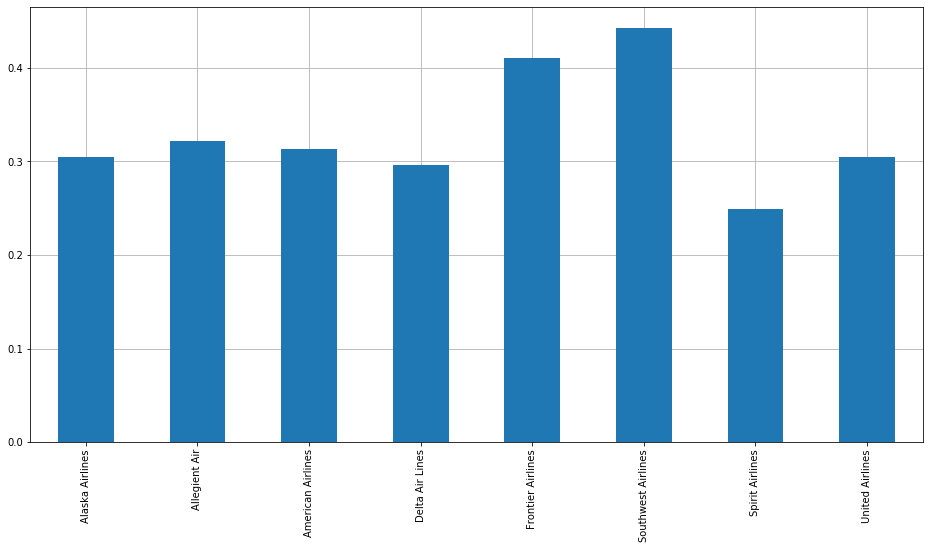

In [22]:
Inbound_plot = InboundTable["% of Flights Delayed"].plot(kind="bar", figsize=(16,8), zorder=2)
plt.grid()

In [23]:
OnlyOutboundDelays
AvgOutboundDelays = pd.DataFrame(OnlyOutboundDelays.groupby('Airline')['DepDelayMinutes'].mean())
AvgOutboundDelays

,DepDelayMinutes
Airline,
Alaska Airlines,27.558824
Allegient Air,54.301370
American Airlines,49.214443
Delta Air Lines,47.594402
Frontier Airlines,65.224299
Southwest Airlines,24.303318
Spirit Airlines,34.250681
United Airlines,66.744536


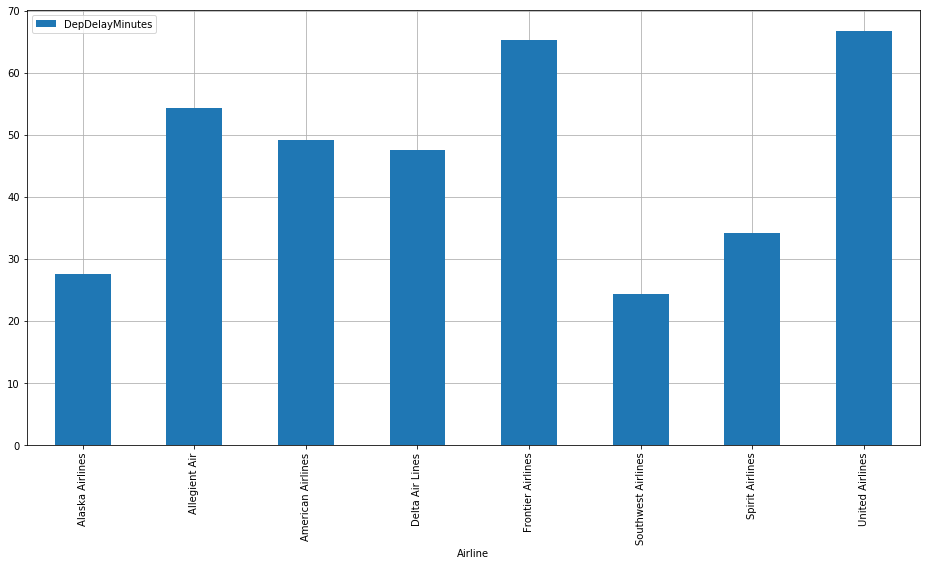

In [24]:
Outbound_plot2 = AvgOutboundDelays.plot(kind="bar", figsize=(16,8), zorder=2)
plt.grid()

In [25]:
OnlyInboundDelays
AvgInboundDelays = pd.DataFrame(OnlyInboundDelays.groupby('Airline')['DepDelayMinutes'].mean())
AvgInboundDelays

,DepDelayMinutes
Airline,
Alaska Airlines,26.293296
Allegient Air,34.044118
American Airlines,41.339006
Delta Air Lines,41.850274
Frontier Airlines,61.059406
Southwest Airlines,26.073519
Spirit Airlines,35.529010
United Airlines,56.199670


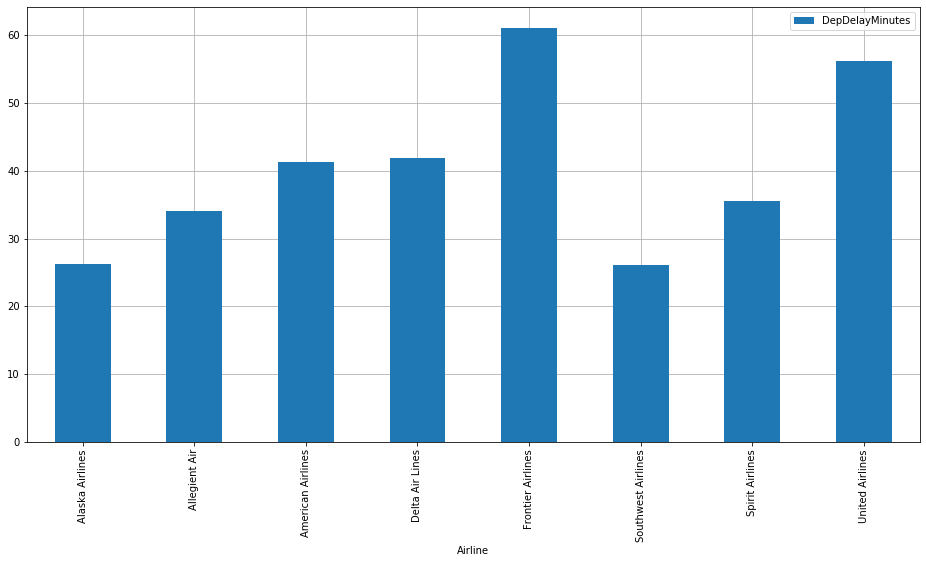

In [26]:
Inbound_plot2 = AvgInboundDelays.plot(kind="bar", figsize=(16,8), zorder=2)
plt.grid()

In [27]:
OutboundCarrierDelays = OutboundData.loc[(OutboundData["CarrierDelay"]) > 0]
OutboundCarrierDelays


,Month,DayofMonth,DayOfWeek,Marketing_Airline_Network,Origin,OriginCityName,Dest,DestCityName,DepDelayMinutes,ArrDelayMinutes,Cancelled,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Airline
4617,1,30,3,DL,MCI,"Kansas City, MO",LAX,"Los Angeles, CA",72.0,91.0,0.0,72.0,0.0,19.0,0.0,0.0,Delta Air Lines
4619,1,30,3,DL,MCI,"Kansas City, MO",MSP,"Minneapolis, MN",282.0,285.0,0.0,282.0,0.0,3.0,0.0,0.0,Delta Air Lines
4736,1,21,1,DL,MCI,"Kansas City, MO",DTW,"Detroit, MI",183.0,176.0,0.0,2.0,0.0,0.0,0.0,174.0,Delta Air Lines
4755,1,22,2,DL,MCI,"Kansas City, MO",ATL,"Atlanta, GA",39.0,28.0,0.0,28.0,0.0,0.0,0.0,0.0,Delta Air Lines
4761,1,23,3,DL,MCI,"Kansas City, MO",SLC,"Salt Lake City, UT",130.0,122.0,0.0,8.0,0.0,0.0,0.0,114.0,Delta Air Lines
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4739,6,14,5,UA,MCI,"Kansas City, MO",IAD,"Washington, DC",1040.0,1036.0,0.0,1036.0,0.0,0.0,0.0,0.0,United Airlines
4751,6,4,2,UA,MCI,"Kansas City, MO",IAD,"Washington, DC",767.0,766.0,0.0,766.0,0.0,0.0,0.0,0.0,United Airlines
4785,6,28,5,G4,MCI,"Kansas City, MO",PGD,"Punta Gorda, FL",344.0,338.0,0.0,338.0,0.0,0.0,0.0,0.0,Allegient Air
4804,6,19,3,G4,MCI,"Kansas City, MO",VPS,"Valparaiso, FL",19.0,61.0,0.0,19.0,0.0,42.0,0.0,0.0,Allegient Air


In [28]:
InboundCarrierDelays = InboundData.loc[(InboundData["CarrierDelay"]) > 0]
InboundCarrierDelays

,Month,DayofMonth,DayOfWeek,Marketing_Airline_Network,Origin,OriginCityName,Dest,DestCityName,DepDelayMinutes,ArrDelayMinutes,Cancelled,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Airline
1,1,10,4,UA,ORD,"Chicago, IL",MCI,"Kansas City, MO",60.0,48.0,0.0,48.0,0.0,0.0,0.0,0.0,United Airlines
55,1,7,1,DL,LAX,"Los Angeles, CA",MCI,"Kansas City, MO",22.0,24.0,0.0,22.0,0.0,2.0,0.0,0.0,Delta Air Lines
78,1,30,3,DL,ATL,"Atlanta, GA",MCI,"Kansas City, MO",19.0,21.0,0.0,19.0,0.0,2.0,0.0,0.0,Delta Air Lines
107,1,2,3,DL,ATL,"Atlanta, GA",MCI,"Kansas City, MO",36.0,25.0,0.0,2.0,0.0,0.0,0.0,23.0,Delta Air Lines
144,1,15,2,DL,ATL,"Atlanta, GA",MCI,"Kansas City, MO",21.0,16.0,0.0,16.0,0.0,0.0,0.0,0.0,Delta Air Lines
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9592,6,13,4,UA,IAH,"Houston, TX",MCI,"Kansas City, MO",98.0,91.0,0.0,91.0,0.0,0.0,0.0,0.0,United Airlines
9599,6,5,3,UA,IAH,"Houston, TX",MCI,"Kansas City, MO",57.0,54.0,0.0,54.0,0.0,0.0,0.0,0.0,United Airlines
9624,6,14,5,G4,PGD,"Punta Gorda, FL",MCI,"Kansas City, MO",235.0,227.0,0.0,178.0,0.0,0.0,0.0,49.0,Allegient Air
9631,6,15,6,G4,SFB,"Sanford, FL",MCI,"Kansas City, MO",54.0,51.0,0.0,6.0,0.0,0.0,0.0,45.0,Allegient Air


In [29]:
OutboundCarrierDelayValueCounts = OutboundCarrierDelays["Airline"].value_counts()
OutboundTable["# of Carrier Delays"] = OutboundCarrierDelayValueCounts
OutboundTable["% of Flights w/ a Carrier Delay"] = OutboundTable["# of Carrier Delays"] / OutboundTable["# of Total Flights"]
OutboundTable["% of Delays due to Carrier Delay"] = OutboundTable["# of Carrier Delays"] / OutboundTable["# of Flights Delayed"]
OutboundTable


TypeError: 'Styler' object does not support item assignment

In [ ]:
Outbound_plot3 = OutboundTable[["% of Flights Delayed", "% of Delays due to Carrier Delay"]].plot(kind="bar", figsize=(16,8), zorder=2, color=("red", "blue"))
plt.grid()
plt.title("Outbound Flight Delay Percentages", fontsize=32,)
plt.show()

In [ ]:
InboundCarrierDelayValueCounts = InboundCarrierDelays["Airline"].value_counts()
InboundTable["# of Carrier Delays"] = InboundCarrierDelayValueCounts
InboundTable["% of Flights w/ a Carrier Delay"] = InboundTable["# of Carrier Delays"] / InboundTable["# of Total Flights"]
InboundTable["% of Delays due to Carrier Delay"] = InboundTable["# of Carrier Delays"] / InboundTable["# of Flights Delayed"]
InboundTable

In [ ]:
Inbound_plot2 = OutboundTable["% of Delays due to Carrier Delay"].plot(kind="bar", figsize=(16,8), zorder=2)
plt.grid()

In [ ]:
Inbound_plot2 = InboundTable["% of Delays due to Carrier Delay"].plot(kind="bar", figsize=(16,8), zorder=2)
plt.grid()

In [ ]:
OutboundMonthDelays = pd.DataFrame(OutboundData.groupby('Month')['DepDelayMinutes'].sum())
OutboundMonthDelays["Total Flights per Month"] = OutboundData["Month"].value_counts()
OutboundMonthDelays["Total Delayed Flights per Month"] = OnlyOutboundDelays['Month'].value_counts()
OutboundMonthDelays["% of Flights Delayed"] = OutboundMonthDelays["Total Delayed Flights per Month"] / OutboundMonthDelays["Total Flights per Month"]
OutboundMonthDelays["Avg Minutes per Delay"] = OutboundMonthDelays["DepDelayMinutes"] / OutboundMonthDelays["Total Delayed Flights per Month"]
OutboundMonthDelays

In [ ]:
Inbound_plot2 = AvgInboundDelays.plot(kind="bar", figsize=(16,8), zorder=2)
plt.grid()

In [ ]:
InboundMonthDelays = pd.DataFrame(InboundData.groupby('Month')['DepDelayMinutes'].sum())
InboundMonthDelays["Total Flights per Month"] = InboundData["Month"].value_counts()
InboundMonthDelays["Total Delayed Flights per Month"] = OnlyInboundDelays['Month'].value_counts()
InboundMonthDelays["% of Flights Delayed"] = InboundMonthDelays["Total Delayed Flights per Month"] / InboundMonthDelays["Total Flights per Month"]
InboundMonthDelays["Avg Minutes per Delay"] = InboundMonthDelays["DepDelayMinutes"] / InboundMonthDelays["Total Delayed Flights per Month"]
InboundMonthDelays

In [ ]:
OutboundWeekDelays = pd.DataFrame(OutboundData.groupby('DayOfWeek')['DepDelayMinutes'].sum())
OutboundWeekDelays["Total Flights"] = OutboundData['DayOfWeek'].value_counts()
OutboundWeekDelays["Total Delayed Flights"] = OnlyOutboundDelays['DayOfWeek'].value_counts()
OutboundWeekDelays['% of Flights Delayed'] = OutboundWeekDelays['Total Delayed Flights'] / OutboundWeekDelays["Total Flights"]
OutboundWeekDelays['Avg Minutes per Delay'] = OutboundWeekDelays["DepDelayMinutes"] / OutboundWeekDelays["Total Delayed Flights"]
OutboundWeekDelays

In [ ]:
InboundWeekDelays = pd.DataFrame(InboundData.groupby('DayOfWeek')['DepDelayMinutes'].sum())
InboundWeekDelays["Total Flights"] = InboundData['DayOfWeek'].value_counts()
InboundWeekDelays["Total Delayed Flights"] = OnlyInboundDelays['DayOfWeek'].value_counts()
InboundWeekDelays['% of Flights Delayed'] = InboundWeekDelays['Total Delayed Flights'] / InboundWeekDelays["Total Flights"]
InboundWeekDelays['Avg Minutes per Delay'] = InboundWeekDelays["DepDelayMinutes"] / InboundWeekDelays["Total Delayed Flights"]
InboundWeekDelays

In [ ]:
OutboundDayDelays = pd.DataFrame(OutboundData.groupby('DayofMonth')["DepDelayMinutes"].sum())
OutboundDayDelays["Total Flights"] = OutboundData['DayofMonth'].value_counts()
OutboundDayDelays["Total Delayed Flights"] = OnlyOutboundDelays["DayofMonth"].value_counts()
OutboundDayDelays["% of Flights Delayed"] = OutboundDayDelays["Total Delayed Flights"] / OutboundDayDelays["Total Flights"]
OutboundDayDelays["Avg Minutes per Delay"] = OutboundDayDelays["DepDelayMinutes"] / OutboundDayDelays["Total Delayed Flights"]
OutboundDayDelays

In [ ]:
InboundDayDelays = pd.DataFrame(InboundData.groupby('DayofMonth')["DepDelayMinutes"].sum())
InboundDayDelays["Total Flights"] = InboundData['DayofMonth'].value_counts()
InboundDayDelays["Total Delayed Flights"] = OnlyInboundDelays["DayofMonth"].value_counts()
InboundDayDelays["% of Flights Delayed"] = InboundDayDelays["Total Delayed Flights"] / InboundDayDelays["Total Flights"]
InboundDayDelays["Avg Minutes per Delay"] = InboundDayDelays["DepDelayMinutes"] / InboundDayDelays["Total Delayed Flights"]
InboundDayDelays